# Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
#Defining Path
path=r'/Users/guillaumemac/Achievement 6'

# Importing Data

In [4]:
#Importing Dataframe
citibike=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','citibike_new.csv'))

# Data Cleaning & Wrangling

In [5]:
citibike.shape

(43021, 21)

In [6]:
citibike.head()

,Unnamed: 0.1,Unnamed: 0,day_of_the_week,start_hour,ride_start_date,ride_start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,ride_end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_min
0,0,0,Mon,18,2013-09-09,18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,16.55
1,1,1,Thu,18,2013-09-12,18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,9.68
2,2,2,Wed,19,2013-09-18,19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,6.02
3,3,3,Sat,11,2013-09-28,11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,9.35
4,4,5,Fri,22,2013-09-27,22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,...,22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986,Female,7.12


In [7]:
citibike.dtypes

Unnamed: 0.1                 int64
Unnamed: 0                   int64
day_of_the_week             object
start_hour                   int64
ride_start_date             object
ride_start_time             object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
ride_end_date               object
ride_end_time               object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                   int64
gender                      object
trip_duration_min          float64
dtype: object

In [8]:
#Dropping Non-Numerical columns
columns_to_drop=['Unnamed: 0.1','Unnamed: 0','day_of_the_week',]
citibike=citibike.drop(columns=columns_to_drop)

In [9]:
#Checking the shape of the data
citibike.shape

(43021, 18)

In [10]:
#Checking the data
citibike.head()

,start_hour,ride_start_date,ride_start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,ride_end_date,ride_end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_min
0,18,2013-09-09,18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09,18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,16.55
1,18,2013-09-12,18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12,18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,9.68
2,19,2013-09-18,19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18,19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,6.02
3,11,2013-09-28,11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28,12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,9.35
4,22,2013-09-27,22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27,22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986,Female,7.12


In [11]:
# Converting date and time columns to datetime data type
citibike['ride_start_datetime'] = pd.to_datetime(citibike['ride_start_date'] + ' ' + citibike['ride_start_time'])
citibike['ride_end_datetime'] = pd.to_datetime(citibike['ride_end_date'] + ' ' + citibike['ride_end_time'])

# Extracting numerical components to make the data compatible for the next steps
citibike['ride_start_year'] = citibike['ride_start_datetime'].dt.year
citibike['ride_start_month'] = citibike['ride_start_datetime'].dt.month
citibike['ride_start_day'] = citibike['ride_start_datetime'].dt.day
citibike['ride_start_hour'] = citibike['ride_start_datetime'].dt.hour
citibike['ride_start_minute'] = citibike['ride_start_datetime'].dt.minute
citibike['ride_start_second'] = citibike['ride_start_datetime'].dt.second

citibike['ride_end_year'] = citibike['ride_end_datetime'].dt.year
citibike['ride_end_month'] = citibike['ride_end_datetime'].dt.month
citibike['ride_end_day'] = citibike['ride_end_datetime'].dt.day
citibike['ride_end_hour'] = citibike['ride_end_datetime'].dt.hour
citibike['ride_end_minute'] = citibike['ride_end_datetime'].dt.minute
citibike['ride_end_second'] = citibike['ride_end_datetime'].dt.second

In [12]:
#Checking the changes made
citibike.head()

,start_hour,ride_start_date,ride_start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,ride_end_date,ride_end_time,end_station_id,...,ride_start_day,ride_start_hour,ride_start_minute,ride_start_second,ride_end_year,ride_end_month,ride_end_day,ride_end_hour,ride_end_minute,ride_end_second
0,18,2013-09-09,18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09,18:35:28,334,...,9,18,18,55,2013,9,9,18,35,28
1,18,2013-09-12,18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12,18:48:34,236,...,12,18,38,53,2013,9,12,18,48,34
2,19,2013-09-18,19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18,19:50:05,513,...,18,19,44,4,2013,9,18,19,50,5
3,11,2013-09-28,11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28,12:03:58,441,...,28,11,54,37,2013,9,28,12,3,58
4,22,2013-09-27,22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27,22:08:08,432,...,27,22,1,1,2013,9,27,22,8,8


In [13]:
# Droping the columns not needed
citibike.drop(['start_hour','start_station_name','start_station_id',
               'end_station_id','end_station_name','ride_start_second',
              'ride_start_minute','ride_end_minute','ride_end_second'], axis=1, inplace=True)

In [14]:
#Checking the changes made
citibike.head()

,ride_start_date,ride_start_time,start_station_latitude,start_station_longitude,ride_end_date,ride_end_time,end_station_latitude,end_station_longitude,trip_duration,subscriber,...,ride_start_datetime,ride_end_datetime,ride_start_year,ride_start_month,ride_start_day,ride_start_hour,ride_end_year,ride_end_month,ride_end_day,ride_end_hour
0,2013-09-09,18:18:55,40.754666,-73.991382,2013-09-09,18:35:28,40.742388,-73.997262,993,Subscriber,...,2013-09-09 18:18:55,2013-09-09 18:35:28,2013,9,9,18,2013,9,9,18
1,2013-09-12,18:38:53,40.719392,-74.002472,2013-09-12,18:48:34,40.728419,-73.987140,581,Subscriber,...,2013-09-12 18:38:53,2013-09-12 18:48:34,2013,9,12,18,2013,9,12,18
2,2013-09-18,19:44:04,40.760193,-73.991255,2013-09-18,19:50:05,40.768254,-73.988639,361,Subscriber,...,2013-09-18 19:44:04,2013-09-18 19:50:05,2013,9,18,19,2013,9,18,19
3,2013-09-28,11:54:37,40.743156,-73.974347,2013-09-28,12:03:58,40.756014,-73.967416,561,Subscriber,...,2013-09-28 11:54:37,2013-09-28 12:03:58,2013,9,28,11,2013,9,28,12
4,2013-09-27,22:01:01,40.730287,-73.990765,2013-09-27,22:08:08,40.726218,-73.983799,427,Subscriber,...,2013-09-27 22:01:01,2013-09-27 22:08:08,2013,9,27,22,2013,9,27,22


In [15]:
#Checking the shape of the data
citibike.shape

(43021, 23)

In [16]:
#Dropping Non-Numerical columns
citibike.drop(['ride_start_datetime','ride_end_datetime'], axis=1, inplace=True)

In [17]:
citibike.head()

,ride_start_date,ride_start_time,start_station_latitude,start_station_longitude,ride_end_date,ride_end_time,end_station_latitude,end_station_longitude,trip_duration,subscriber,...,gender,trip_duration_min,ride_start_year,ride_start_month,ride_start_day,ride_start_hour,ride_end_year,ride_end_month,ride_end_day,ride_end_hour
0,2013-09-09,18:18:55,40.754666,-73.991382,2013-09-09,18:35:28,40.742388,-73.997262,993,Subscriber,...,Female,16.55,2013,9,9,18,2013,9,9,18
1,2013-09-12,18:38:53,40.719392,-74.002472,2013-09-12,18:48:34,40.728419,-73.987140,581,Subscriber,...,Male,9.68,2013,9,12,18,2013,9,12,18
2,2013-09-18,19:44:04,40.760193,-73.991255,2013-09-18,19:50:05,40.768254,-73.988639,361,Subscriber,...,Male,6.02,2013,9,18,19,2013,9,18,19
3,2013-09-28,11:54:37,40.743156,-73.974347,2013-09-28,12:03:58,40.756014,-73.967416,561,Subscriber,...,Female,9.35,2013,9,28,11,2013,9,28,12
4,2013-09-27,22:01:01,40.730287,-73.990765,2013-09-27,22:08:08,40.726218,-73.983799,427,Subscriber,...,Female,7.12,2013,9,27,22,2013,9,27,22


In [18]:
# Checking for missing values in the numerical dataframe
citibike.isnull().sum()

ride_start_date            0
ride_start_time            0
start_station_latitude     0
start_station_longitude    0
ride_end_date              0
ride_end_time              0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
trip_duration_min          0
ride_start_year            0
ride_start_month           0
ride_start_day             0
ride_start_hour            0
ride_end_year              0
ride_end_month             0
ride_end_day               0
ride_end_hour              0
dtype: int64

In [19]:
citibike.columns

Index(['ride_start_date', 'ride_start_time', 'start_station_latitude',
       'start_station_longitude', 'ride_end_date', 'ride_end_time',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'trip_duration_min',
       'ride_start_year', 'ride_start_month', 'ride_start_day',
       'ride_start_hour', 'ride_end_year', 'ride_end_month', 'ride_end_day',
       'ride_end_hour'],
      dtype='object')

## Standarizing the data using the Z-score technique

In [20]:
from sklearn.preprocessing import StandardScaler
#Selecting columns to standarize
columns_to_standardize = ['start_station_latitude',
                          'start_station_longitude','end_station_latitude','end_station_longitude', 
                          'birth_year', 'trip_duration_min',
                          'ride_start_year', 'ride_start_month', 'ride_start_day',
                          'ride_start_hour', 'ride_end_year', 'ride_end_month', 'ride_end_day',
                          'ride_end_hour']

# Initializing the StandardScaler
scaler = StandardScaler()

# Standardizing the selected columns
citibike[columns_to_standardize] = scaler.fit_transform(citibike[columns_to_standardize])


In [21]:
citibike.head()

,ride_start_date,ride_start_time,start_station_latitude,start_station_longitude,ride_end_date,ride_end_time,end_station_latitude,end_station_longitude,trip_duration,subscriber,...,gender,trip_duration_min,ride_start_year,ride_start_month,ride_start_day,ride_start_hour,ride_end_year,ride_end_month,ride_end_day,ride_end_hour
0,2013-09-09,18:18:55,1.030165,-0.034734,2013-09-09,18:35:28,0.424379,-0.486226,993,Subscriber,...,Female,0.424823,0.0,0.0,-0.852317,0.793785,0.0,-0.009643,-0.852404,0.758210
1,2013-09-12,18:38:53,-0.769682,-0.931340,2013-09-12,18:48:34,-0.288262,0.331796,581,Subscriber,...,Male,-0.362635,0.0,0.0,-0.494427,0.793785,0.0,-0.009643,-0.494512,0.758210
2,2013-09-18,19:44:04,1.312161,-0.024514,2013-09-18,19:50:05,1.743935,0.210626,361,Subscriber,...,Male,-0.782154,0.0,0.0,0.221354,0.996517,0.0,-0.009643,0.221272,0.959151
3,2013-09-28,11:54:37,0.442851,1.342378,2013-09-28,12:03:58,1.119513,1.925655,561,Subscriber,...,Female,-0.400461,0.0,0.0,1.414321,-0.625340,0.0,-0.009643,1.414245,-0.447436
4,2013-09-27,22:01:01,-0.213793,0.015132,2013-09-27,22:08:08,-0.400531,0.601783,427,Subscriber,...,Female,-0.656069,0.0,0.0,1.295024,1.604713,0.0,-0.009643,1.294948,1.561974


In [22]:
#Dropping Non-Numerical columns
citibike.drop(['ride_start_date','ride_start_time','ride_end_date',
              'ride_end_time','subscriber','gender'], axis=1, inplace=True)

# 3. Elbow technique


In [23]:
#Defining the range of potential clusters in the data.
num_cl = range(1, 10) 
#Defineing the k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [24]:
#Creating a score that represents  a rate of variation for the given cluster option.
score = [kmeans[i].fit(citibike).score(citibike) for i in range(len(kmeans))]

score

[-11788494427.463827,
 -3831668309.7764177,
 -1866288346.9216084,
 -1088157756.5100913,
 -705262582.1588715,
 -487788480.65117776,
 -357357274.5624211,
 -274714107.55875915,
 -216772450.7873139]

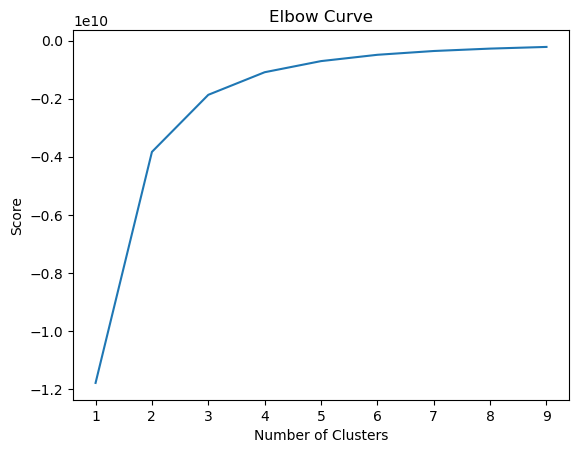

In [25]:
#Ploting the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### I kept adjusting the range of clusters to see if i would find breaking point of the curve. Ultimately, I chose the clusters to be 3 as that is the point where the curve start flattening out after jumps rapidly from 1 to 2 on the x-axis. The curve rised only slightly after 2.

# 5. Running the k-means algorithm

In [26]:
# Create the k-means object.

kmeans = KMeans(n_clusters =3) 

In [27]:
# Fit the k-means object to the data.

kmeans.fit(citibike)

KMeans(n_clusters=3)

#### Attaching  a new column with the resulting clusters

In [28]:
citibike['clusters'] = kmeans.fit_predict(citibike)

In [29]:
#Checking the changes made
citibike.head()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year,trip_duration_min,ride_start_year,ride_start_month,ride_start_day,ride_start_hour,ride_end_year,ride_end_month,ride_end_day,ride_end_hour,clusters
0,1.030165,-0.034734,0.424379,-0.486226,993,-0.687878,0.424823,0.0,0.0,-0.852317,0.793785,0.0,-0.009643,-0.852404,0.758210,2
1,-0.769682,-0.931340,-0.288262,0.331796,581,0.664830,-0.362635,0.0,0.0,-0.494427,0.793785,0.0,-0.009643,-0.494512,0.758210,1
2,1.312161,-0.024514,1.743935,0.210626,361,1.205913,-0.782154,0.0,0.0,0.221354,0.996517,0.0,-0.009643,0.221272,0.959151,1
3,0.442851,1.342378,1.119513,1.925655,561,1.115732,-0.400461,0.0,0.0,1.414321,-0.625340,0.0,-0.009643,1.414245,-0.447436,1
4,-0.213793,0.015132,-0.400531,0.601783,427,0.935371,-0.656069,0.0,0.0,1.295024,1.604713,0.0,-0.009643,1.294948,1.561974,1


In [30]:
#Checking clusters counts
citibike['clusters'].value_counts()

clusters
1    25762
2    13079
0     4180
Name: count, dtype: int64

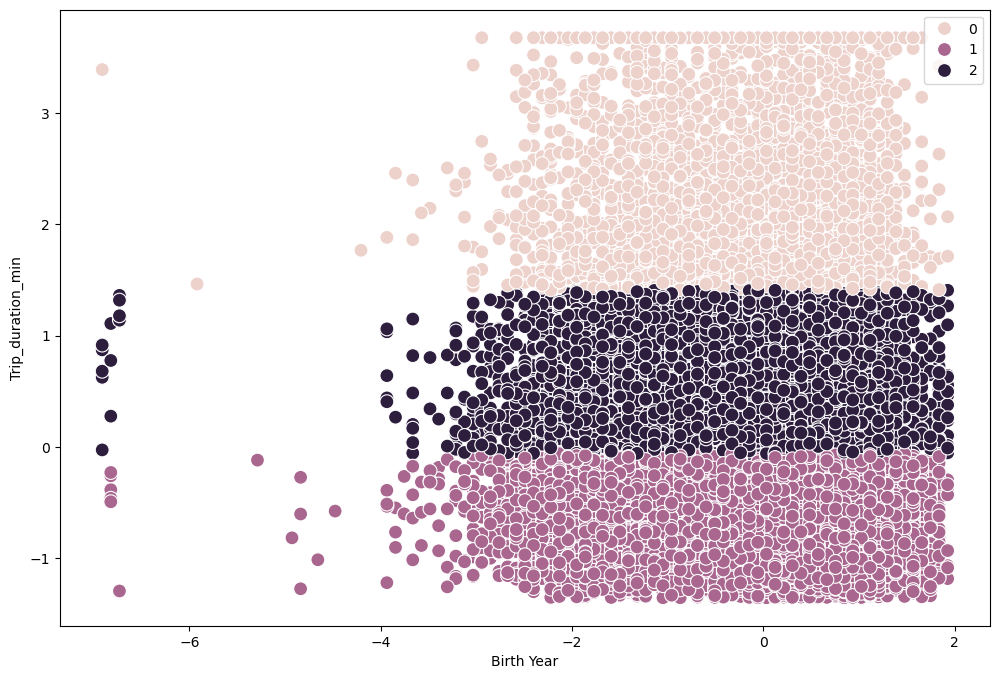

In [31]:
# Plotting the clusters for the "Birth_year" and "Trip Duration in Minutes" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=citibike['birth_year'], y=citibike['trip_duration_min'], hue=kmeans.labels_, s=100) 
#Removing the grid from the background.
ax.grid(False) 
# Labeling x-axis.
plt.xlabel('Birth Year')
#Labeling y-axis.
plt.ylabel('Trip_duration_min')
plt.show()

### The cluster with the Pink color(1) indicates that all age groups are actually having longer trip duration.However they also have a wide ride of trip durations. Given the situation. With this in mind, I would say that trip duration doesn't have a direct relationship with the rider's age.

In [32]:
citibike.loc[citibike['clusters'] == 2, 'cluster'] = 'dark purple'
citibike.loc[citibike['clusters'] == 1, 'cluster'] = 'purple'
citibike.loc[citibike['clusters'] == 0, 'cluster'] = 'pink'

In [33]:
citibike.groupby('cluster').agg({'birth_year':['mean', 'median'], 
                         'trip_duration_min':['mean', 'median'], 
                         'ride_start_hour':['mean', 'median'],
                          'ride_end_hour':['mean', 'median']})

birth_year           trip_duration_min           ride_start_hour  \
                  mean    median              mean    median            mean   
cluster                                                                        
dark purple  -0.026352  0.213927          0.514837  0.439724        0.036287   
pink         -0.102244  0.123747          2.310540  2.108630        0.103623   
purple        0.029968  0.213927         -0.636271 -0.638876       -0.035236   

                      ride_end_hour            
               median          mean    median  
cluster                                        
dark purple  0.185588      0.043478  0.155387  
pink         0.388320      0.154377  0.356328  
purple       0.185588     -0.047122  0.155387

# Propositions


#### In my point of view, i find this data not compatible for the K-means clustering, I would be reasonable to explore other method before I can make my idea definitive. However, I got insight from this that The age of tthe rider doesn’t seem to affect the trip duration much. 